<a href="https://colab.research.google.com/github/sailajakarra/TF_BS/blob/master/NLP_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [2]:
embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

corpus = []

In [15]:
ag = embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

corpus = []

In [18]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv'
csv_file = ku.get_file('/content/stanford_cleaned.csv',url)

In [19]:

num_sentences = 0

with open("stanford_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)


In [17]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [20]:
trained_weights_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt'
glove_file = ku.get_file('/content/glove_6b_100d.txt',trained_weights_url)

347119616/347116733 [==============================] - 6s 0us/step


In [23]:
embeddings_index = {}
with open('/content/glove_6b_100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs

In [24]:
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           13840200  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 13,905,353
Trainable params: 65,153
Non-trainable params: 13,840,200
_______________________________________

In [29]:
num_epochs = 10

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

In [30]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
4500/4500 - 14s - loss: 0.4783 - accuracy: 0.7650 - val_loss: 0.5090 - val_accuracy: 0.7526
Epoch 2/10
4500/4500 - 14s - loss: 0.4725 - accuracy: 0.7686 - val_loss: 0.5037 - val_accuracy: 0.7521
Epoch 3/10
4500/4500 - 14s - loss: 0.4681 - accuracy: 0.7712 - val_loss: 0.5003 - val_accuracy: 0.7528
Epoch 4/10
4500/4500 - 14s - loss: 0.4651 - accuracy: 0.7742 - val_loss: 0.5055 - val_accuracy: 0.7502
Epoch 5/10
4500/4500 - 15s - loss: 0.4615 - accuracy: 0.7759 - val_loss: 0.4992 - val_accuracy: 0.7536
Epoch 6/10
4500/4500 - 14s - loss: 0.4581 - accuracy: 0.7778 - val_loss: 0.5044 - val_accuracy: 0.7516
Epoch 7/10
4500/4500 - 14s - loss: 0.4563 - accuracy: 0.7790 - val_loss: 0.5066 - val_accuracy: 0.7493
Epoch 8/10
4500/4500 - 14s - loss: 0.4531 - accuracy: 0.7809 - val_loss: 0.5072 - val_accuracy: 0.7534
Epoch 9/10
4500/4500 - 14s - loss: 0.4510 - accuracy: 0.7820 - val_loss: 0.5068 - val_accuracy: 0.7524
Epoch 10/10
4500/4500 - 14s - loss: 0.4495 - accuracy: 0.7818 - val_loss:

<Figure size 432x288 with 0 Axes>

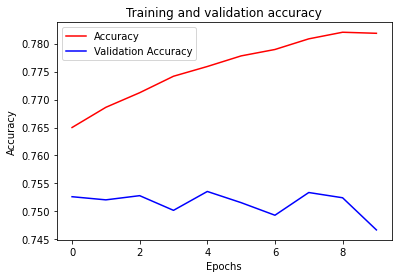

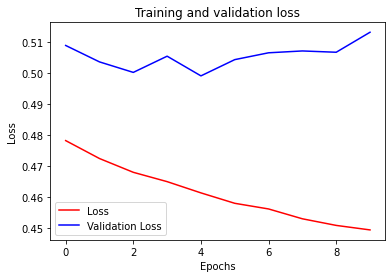

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()